# Importing the required libraries


In [3]:
# import statements
import os
# import torch
# import torch.optim as optim
# import torch.nn as nn
# import torch.nn.functional as F
# import torchvision.transforms as transforms
# import torchvision
# from torchvision import datasets, transforms
# from torchvision.datasets import ImageFolder, DatasetFolder
import matplotlib.pyplot as plt
# from torch.utils.data import DataLoader, random_split
# import numpy as np
import sklearn
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
# from torchvision.transforms import ToTensor
# import pandas as pd
# from yellowbrick.classifier import ClassificationReport
# from texttable import Texttable
# from pytorch_lightning import Trainer
from preprocessing import*
from model.convolutional_neural_network import *
from model.Executor import *
import warnings  # ignore any warnings
warnings.filterwarnings("ignore")

# Training Dataset Creation

Loading the dataset from the directory

In [4]:
directory_path = "./dataset" # path directory
dataset = load_data(directory_path)  # load dataset from the given directory

Counting the number of images present in each of the classes

In [5]:
print(type(dataset))
print("The number of images for the")
# def data_class_distribution(dataset):  # gives the count of each classes of the dataset i.e. no of images per class
#     data_class_count = {}
#     for _, index in dataset:
#         label = classes[index]
#         if label not in data_class_count:
#             data_class_count[label] = 0
#         data_class_count[label] += 1
#     return data_class_count  # returns the count
    
# data_class_count = data_class_distribution(dataset)
# print("The number of images present in each of the three classes:", data_class_count) # print count of classes

<class 'torchvision.datasets.folder.ImageFolder'>
The number of images for the


In [6]:
train_dataset, val_dataset, test_dataset = split_data(dataset)

# Loading Data with the help of DataLoader

In [7]:
train_loader = train_dataloarder(train_dataset)
val_loader = validation_dataloarder(val_dataset)
test_loader = test_dataloarder(test_dataset)

print("Length of the train_loader:", len(train_loader))
print("Length of the val_loader:", len(val_loader))
print("Length of the test_loader:", len(test_loader))

Length of the train_loader: 96
Length of the val_loader: 32
Length of the test_loader: 32


# Training the CNN model

In [8]:
num_epochs = 4
exec_obj = Executor()
all_loss,iter_loss,accuracy = exec_obj.training_model_executor(train_loader, num_epochs)


 0/4... rate=0 Hz, eta=?, total=0:00:00, wall=17:04 EST
current iter acc: 85.01048218029351
current iter loss: 0.7015722578701874
 1/4... rate=0.04 Hz, eta=0:01:17, total=0:00:25, wall=17:04 EST
current iter acc: 92.9769392033543
current iter loss: 0.5431882791162934
 2/4... rate=0.04 Hz, eta=0:00:49, total=0:00:49, wall=17:04 EST
current iter acc: 91.71907756813418
current iter loss: 0.4425082605092838
 3/4... rate=0.04 Hz, eta=0:00:24, total=0:01:13, wall=17:05 EST
current iter acc: 94.86373165618448
current iter loss: 0.38441847387214995
 4/4... rate=0.04 Hz, eta=0:00:00, total=0:01:36, wall=17:05 EST


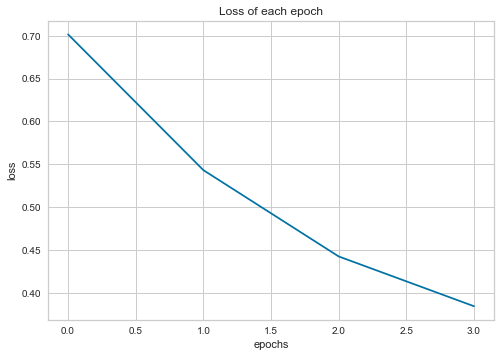

In [12]:
plt.plot(iter_loss)
plt.title("Loss of each epoch")
plt.xlabel("epochs")
plt.ylabel("loss");

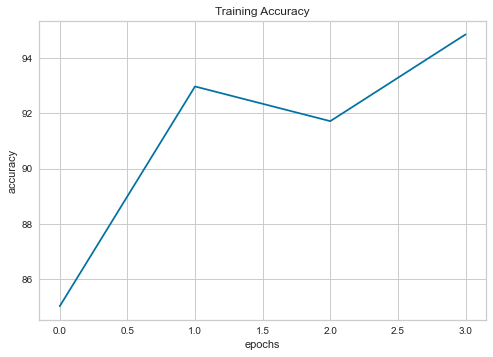

In [13]:
plt.plot(accuracy)
plt.title("Training Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy");

# Validating Network

Prediction of the Images


In [8]:
def prediction(predlab, testlab):  # method to show comparsion between Actual vs Predicted
    print("Prediction vs Actual class Label")
    predicted_list = []
    actual_list = []
    for i in predlab:
        if i == 0:  
            predicted_list.append("without_mask")
        elif i ==1: 
            predicted_list.append("with_mask")
        else :
            predicted_list.append("not_a_person")
 
    for i in testlab:
        if i == 0:  
            actual_list.append("without_mask")
        elif i ==1:
            actual_list.append("with_mask")
        else:
            actual_list.append("not_a_person")
        
    t = Texttable()
    main_row = [['Predicted', 'Actual']]

    for i in range(0, len(predicted_list)):
        tmp = [predicted_list[i],actual_list[i]]
        main_row.append(tmp)
    t.add_rows(main_row)
    print(t.draw()) # printing the talbe

In [9]:
acc = evaluate_accuracy(net, val_loader)   # evaluate the accuracy on the validation set
print("Accuracy of the Model on Test set: ",acc)
testimg, testlab = next(iter(val_loader))
testimg, testlab = testimg, testlab

pred = net(testimg)
predlab = torch.argmax(pred,axis=1)  

prediction(predlab, testlab) # predictions of the validation set

NameError: name 'evaluate_accuracy' is not defined

# Testing Network



In [16]:
acc = evaluate_accuracy(net, test_loader)  # evaluate the accuracy on the test set
print("Accuracy of the Model on Test set: ",acc)
testimg, testlab = next(iter(test_loader))
testimg, testlab = testimg, testlab

pred = net(testimg)
predlab = torch.argmax(pred,axis=1)
prediction(predlab[0:10], testlab[0:10]) # predictions of the first 10 test set


Accuracy of the Model on Test set:  97.4921630094044
Prediction vs Actual class Label
+--------------+--------------+
|  Predicted   |    Actual    |
+==============+==============+
| not_a_person | not_a_person |
+--------------+--------------+
| without_mask | without_mask |
+--------------+--------------+
| without_mask | without_mask |
+--------------+--------------+
| not_a_person | not_a_person |
+--------------+--------------+
| without_mask | without_mask |
+--------------+--------------+
| without_mask | without_mask |
+--------------+--------------+
| with_mask    | with_mask    |
+--------------+--------------+
| not_a_person | not_a_person |
+--------------+--------------+
| with_mask    | with_mask    |
+--------------+--------------+
| without_mask | without_mask |
+--------------+--------------+


# Convolutional Neural Network Model Evaluation
1. Confustion Matrix
2. Precision
3. Recall
4. Accuracy
5. F1-Score

# Confusion Matrix

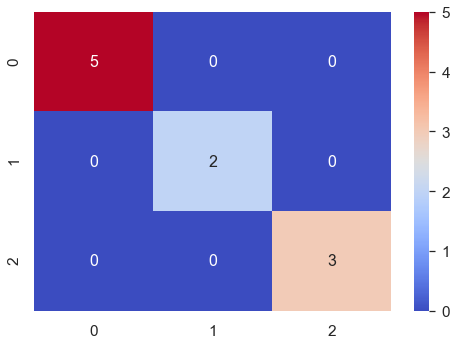

[[5 0 0]
 [0 2 0]
 [0 0 3]]


In [17]:
pred = predlab.numpy()   # plot the confusion matrix 
test = testlab.numpy()
matrix = confusion_matrix(test,pred)
sns.set(font_scale=1.4) # for label size
sns.heatmap(matrix, annot=True, annot_kws={"size": 16},cmap="coolwarm")  # use of heatmap
plt.show()  # plot confusion matrix
print(matrix)


# Classification Report

In [18]:
report = classification_report(test, pred, target_names=['with_mask','without_mask','not_a_person'])
print(report)  

              precision    recall  f1-score   support

   with_mask       1.00      1.00      1.00         7
without_mask       1.00      1.00      1.00         1
not_a_person       1.00      1.00      1.00         2

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

